In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
curve_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [2]:
df=pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df['is_canceled'].value_counts() #target variable

0    75166
1    44224
Name: is_canceled, dtype: int64

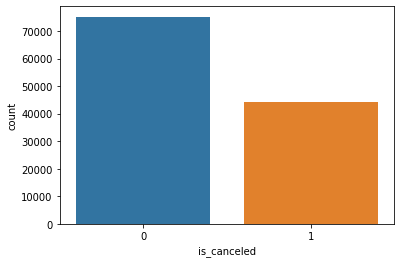

In [5]:
sns.countplot(df['is_canceled'])

In [6]:
df.shape

(119390, 32)

# Missing Values

In [7]:
df.isnull().sum()*100/df.shape[0]

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [8]:
df.drop('company',axis=1, inplace=True)

In [9]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [10]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [11]:
df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [12]:
df[df['children']==10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,...,2,No Deposit,8.0,0,Contract,133.16,0,1,No-Show,2015-07-12


In [13]:
df.drop([328],axis=0,inplace=True) # outliers values delete. 

In [14]:
df['children'].unique()

array([ 0.,  1.,  2.,  3., nan])

# Fillna Values

In [15]:
df['country'].replace(np.nan,"Undefined",inplace=True)
df['agent'].replace(np.nan , 0 , inplace=True)
df['children'].replace(np.nan , 0 , inplace=True)

In [16]:
df.isnull().sum()*100/df.shape[0]

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr         

In [17]:
df=df.to_csv('Clear_Hotel_Booking.csv',encoding='utf8')

# Virtualization with Clear Data

In [18]:
df= pd.read_csv('Clear_Hotel_Booking.csv')
df.drop('Unnamed: 0',axis=1 , inplace=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119389.0,0.370411,0.482917,0.00,0.00,0.00,1.0,1.0
lead_time,119389.0,104.011827,106.863450,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119389.0,2016.156564,0.707471,2015.00,2016.00,2016.00,2017.0,2017.0
arrival_date_week_number,119389.0,27.165158,13.605194,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119389.0,15.798273,8.780859,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119389.0,0.927573,0.998578,0.00,0.00,1.00,2.0,19.0
stays_in_week_nights,119389.0,2.500239,1.908170,0.00,1.00,2.00,3.0,50.0
adults,119389.0,1.856402,0.579263,0.00,2.00,2.00,2.0,55.0
children,119389.0,0.103804,0.397526,0.00,0.00,0.00,0.0,3.0
babies,119389.0,0.007949,0.097437,0.00,0.00,0.00,0.0,10.0


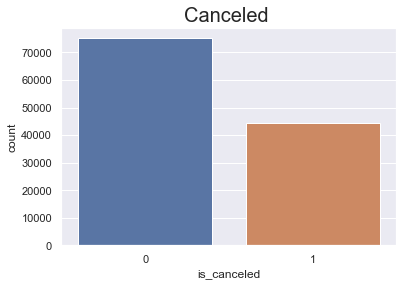

In [20]:
sns.set(style = "darkgrid")
plt.title("Canceled ", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "is_canceled", data = df)

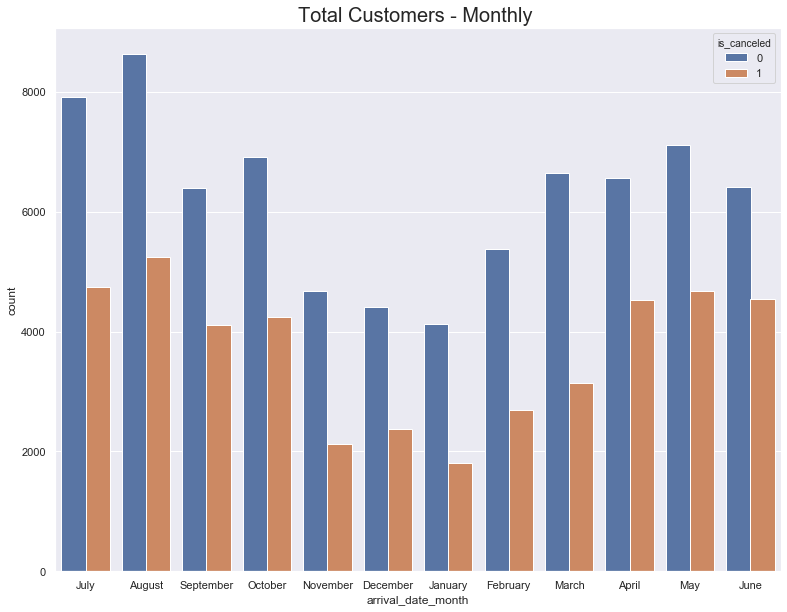

In [21]:
plt.figure(figsize =(13,10))
sns.set(style="darkgrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'is_canceled', data = df)

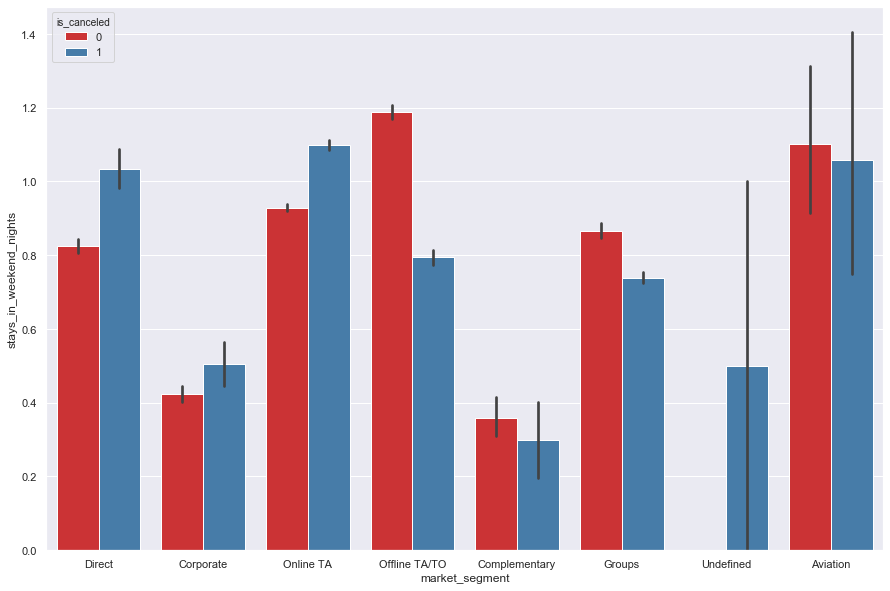

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(x = "market_segment", y = "stays_in_weekend_nights", data = df, hue = "is_canceled", palette = 'Set1');

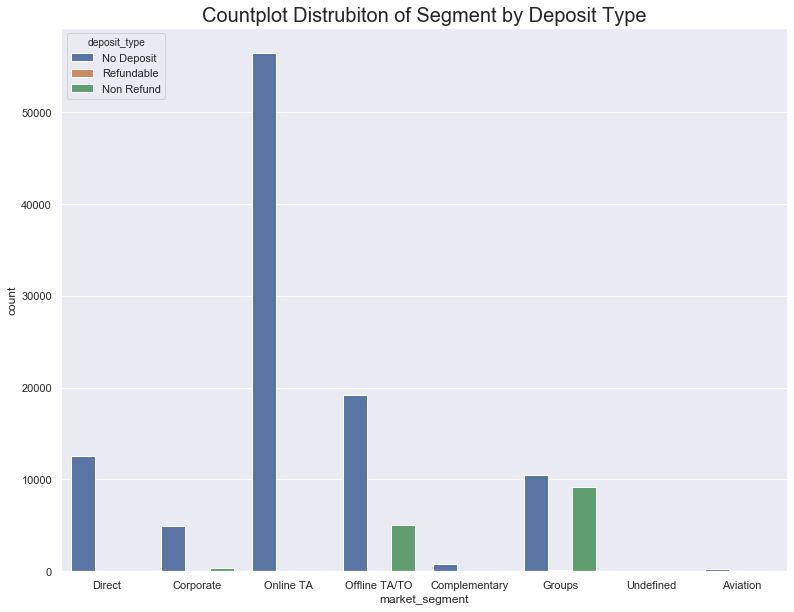

In [23]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distrubiton of Segment by Deposit Type", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'deposit_type', data = df)

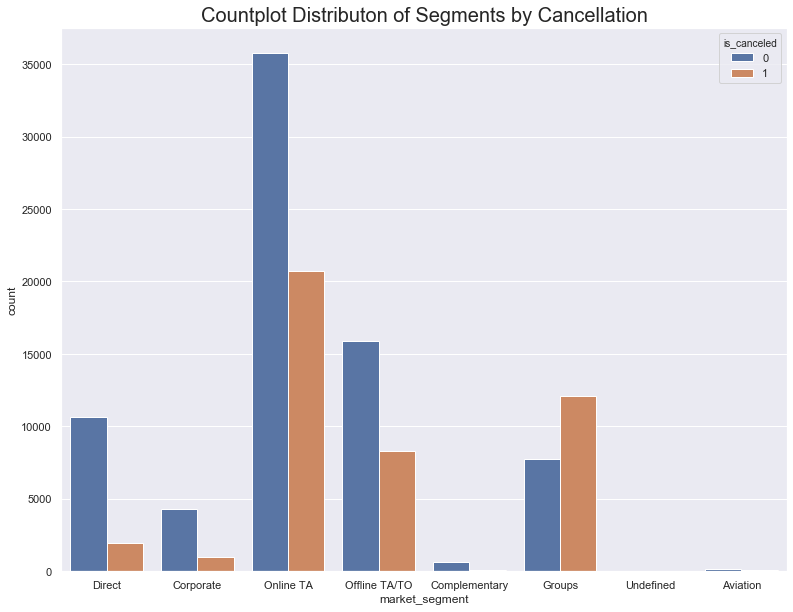

In [24]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = df)

# Encoding Process

In [25]:
df['hotel'] = pd.get_dummies(df['hotel'],drop_first=True)
df['meal'] = pd.get_dummies(df['meal'],drop_first=True)
df['market_segment'] = pd.get_dummies(df['market_segment'],drop_first=True)
df['distribution_channel'] = pd.get_dummies(df['distribution_channel'],drop_first=True)
df['deposit_type'] = pd.get_dummies(df['deposit_type'],drop_first=True)
df['customer_type'] = pd.get_dummies(df['customer_type'],drop_first=True)
df['assigned_room_type'] = pd.get_dummies(df['assigned_room_type'],drop_first=True)
df['country'] = pd.get_dummies(df['country'],drop_first=True)

In [26]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,July,27,1,0,0,2,...,3,0,0.0,0,0,0.0,0,0,Check-Out,2015-07-01
1,1,0,737,2015,July,27,1,0,0,2,...,4,0,0.0,0,0,0.0,0,0,Check-Out,2015-07-01
2,1,0,7,2015,July,27,1,0,1,1,...,0,0,0.0,0,0,75.0,0,0,Check-Out,2015-07-02
3,1,0,13,2015,July,27,1,0,1,1,...,0,0,304.0,0,0,75.0,0,0,Check-Out,2015-07-02
4,1,0,14,2015,July,27,1,0,2,2,...,0,0,240.0,0,0,98.0,0,1,Check-Out,2015-07-03


In [27]:
df_corr=df.corr()
df_corr

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
hotel,1.000000,-0.136549,-0.075376,-0.035249,-0.001271,0.001867,0.186568,0.233990,0.013180,0.044032,...,0.004442,-0.075380,0.072791,-0.172001,0.651057,-0.072431,0.023122,-0.096728,0.218878,0.043384
is_canceled,-0.136549,1.000000,0.293131,0.016678,0.008147,-0.006125,-0.001825,0.024723,0.060015,0.004777,...,-0.057357,-0.037609,-0.144416,0.481465,-0.046523,0.054188,-0.038697,0.047550,-0.195496,-0.234666
lead_time,-0.075376,0.293131,1.000000,0.040136,0.126871,0.002266,0.085686,0.165825,0.119520,-0.037615,...,-0.073549,-0.007865,0.000159,0.380178,-0.012642,0.170084,-0.031925,-0.063075,-0.116452,-0.095710
arrival_date_year,-0.035249,0.016678,0.040136,1.000000,-0.540566,-0.000227,0.021541,0.030939,0.029639,0.055119,...,0.029217,-0.048613,0.030911,-0.065969,0.056456,-0.056499,-0.010983,0.197591,-0.013688,0.108540
arrival_date_week_number,-0.001271,0.008147,0.126871,-0.540566,1.000000,0.066810,0.018205,0.015555,0.025909,0.005501,...,-0.020903,0.014982,0.005505,0.007773,-0.018243,0.022933,0.011618,0.075790,0.001921,0.026149
arrival_date_day_of_month,0.001867,-0.006125,0.002266,-0.000227,0.066810,1.000000,-0.016344,-0.028161,-0.001565,0.014681,...,-0.000300,0.007061,0.010623,-0.008617,0.000200,0.022727,-0.001549,0.030248,0.008683,0.003064
stays_in_weekend_nights,0.186568,-0.001825,0.085686,0.021541,0.018205,-0.016344,1.000000,0.498920,0.091868,0.045273,...,-0.042715,-0.018448,0.063216,-0.114270,0.161450,-0.054150,-0.007161,0.049328,-0.018548,0.072660
stays_in_week_nights,0.233990,0.024723,0.165825,0.030939,0.015555,-0.028161,0.498920,1.000000,0.092973,0.043501,...,-0.048743,-0.024519,0.096129,-0.079992,0.195169,-0.002016,-0.016180,0.065221,-0.024853,0.068178
adults,0.013180,0.060015,0.119520,0.029639,0.025909,-0.001565,0.091868,0.092973,1.000000,0.030468,...,-0.107983,-0.046119,-0.051680,-0.028979,0.024995,-0.008283,0.058976,0.230640,0.014785,0.122883
children,0.044032,0.004777,-0.037615,0.055119,0.005501,0.014681,0.045273,0.043501,0.030468,1.000000,...,-0.021107,0.059474,0.048511,-0.096841,0.050842,-0.033330,-0.006652,0.325566,0.056454,0.081835


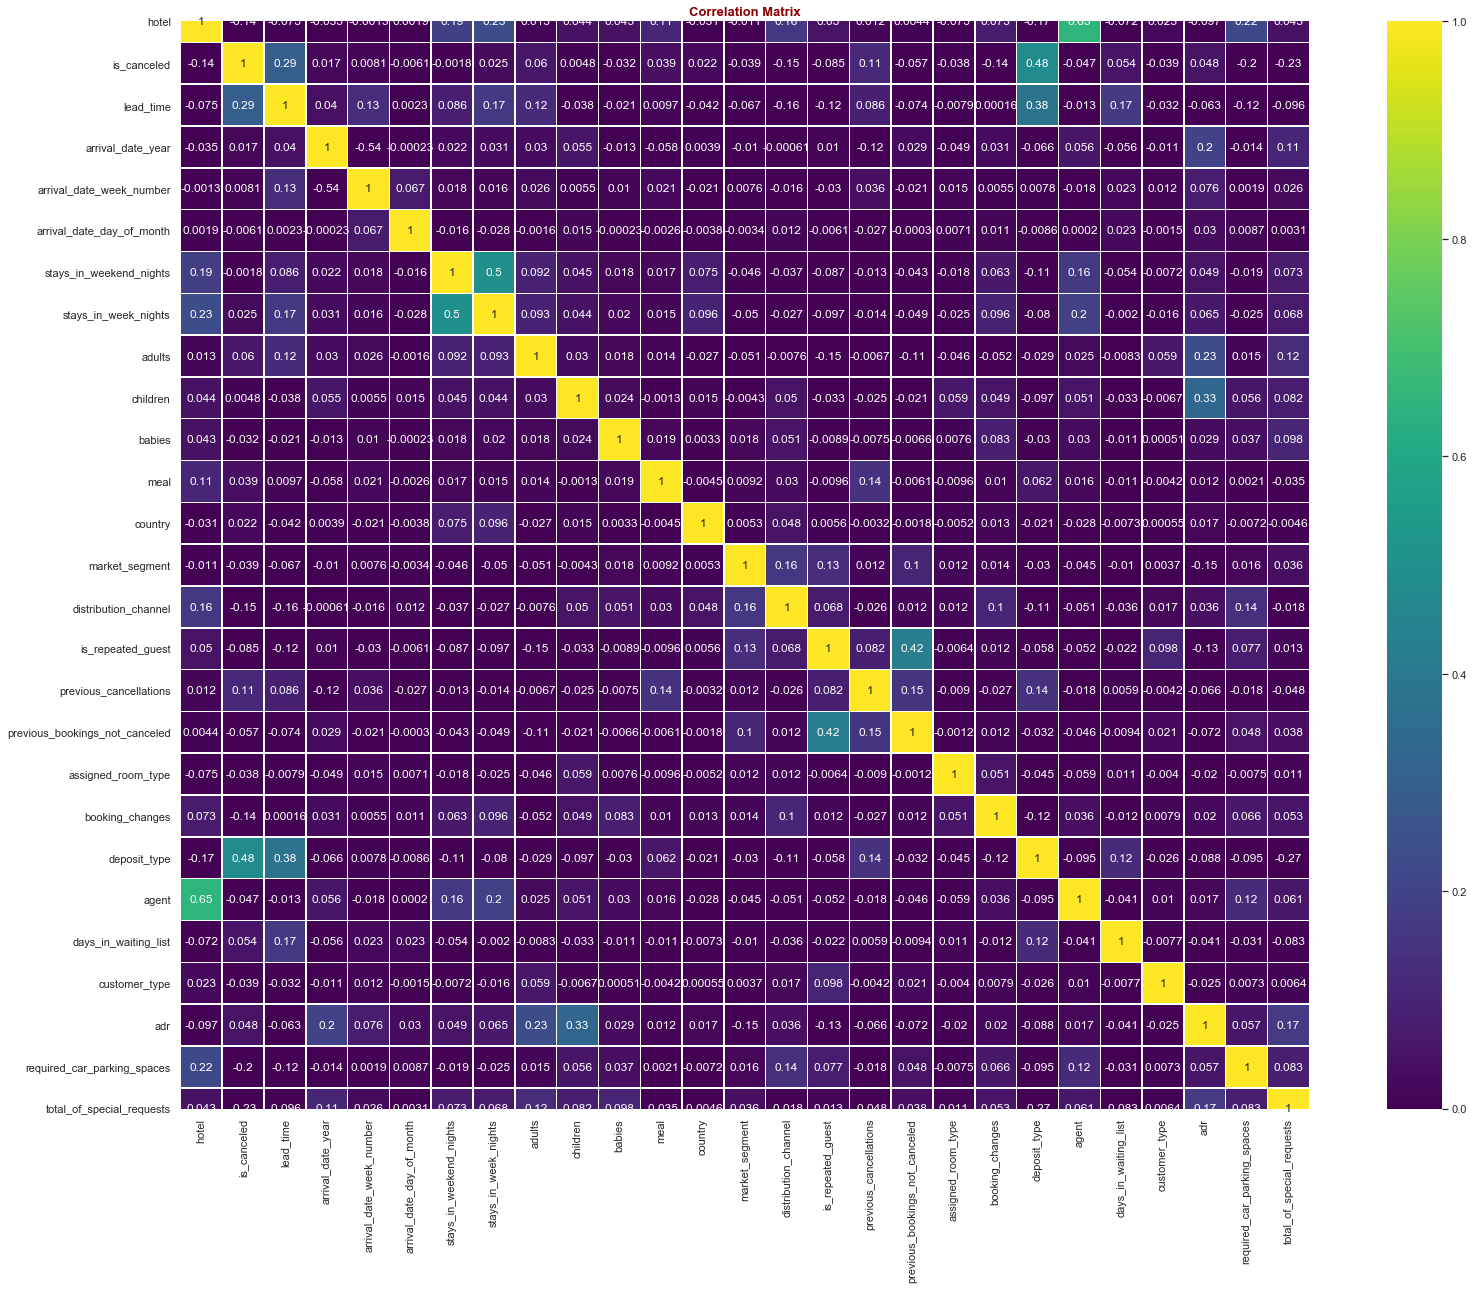

In [28]:
plt.figure(figsize=(28,20))
sns.heatmap(df_corr, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=title_font)
plt.show()

# Model

In [29]:
import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [30]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,July,27,1,0,0,2,...,3,0,0.0,0,0,0.0,0,0,Check-Out,2015-07-01
1,1,0,737,2015,July,27,1,0,0,2,...,4,0,0.0,0,0,0.0,0,0,Check-Out,2015-07-01
2,1,0,7,2015,July,27,1,0,1,1,...,0,0,0.0,0,0,75.0,0,0,Check-Out,2015-07-02
3,1,0,13,2015,July,27,1,0,1,1,...,0,0,304.0,0,0,75.0,0,0,Check-Out,2015-07-02
4,1,0,14,2015,July,27,1,0,2,2,...,0,0,240.0,0,0,98.0,0,1,Check-Out,2015-07-03


# # Stats Model 

### We create model from statsmodels.api because we apply backward elimination on dependent variables.

In [46]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

X = df.drop(['reservation_status_date',"is_canceled","arrival_date_year","arrival_date_month","reservation_status"
             ,"required_car_parking_spaces"
             ,"reserved_room_type","babies"],axis=1)
y = df['is_canceled']

sc = StandardScaler()
X_scl = sc.fit_transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)


loj = LogisticRegression(solver = "liblinear")
loj = sm.Logit(y_train,X_train)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.482499
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_canceled   No. Observations:                95511
Model:                          Logit   Df Residuals:                    95488
Method:                           MLE   Df Model:                           22
Date:                Thu, 02 Jul 2020   Pseudo R-squ.:                  0.2680
Time:                        14:21:23   Log-Likelihood:                -46084.
converged:                       True   LL-Null:                       -62958.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
hotel                             -0.3559      0.026    -13.955      0.000      -0.406      -0.306
lead_time                          0.0025   9.14e-05     27.520      0.000       0.002       0.003
arrival_date_week_number          -0.0141      0.001    -23.832      0.000      -0.015      -0.013
arrival_date_day_of_month         -0.0134      0.001    -15.450      0.000      -0.015      -0.012
stays_in_weekend_nights            0.0308      0.009      3.314      0.001       0.013       0.049
stays_in_week_nights               0.0193      0.005      3.939      0.000       0.010       0.029
adults                            -0.2380      0.014    -17.349      0.000      -0.265      -0.211
children                           0.2263      0.020     11.490      0.000       0.188       0.265
meal                               0.4682      0.109      4.299      0.000       0.255       0.682
country                            1.2515      0.132      9.500      0.000       0.993       1.510
market_segment                     0.2286      0.139      1.647      0.099      -0.043       0.501
distribution_channel              -0.8835      0.030    -29.609      0.000      -0.942      -0.825
is_repeated_guest                 -1.0463      0.085    -12.346      0.000      -1.212      -0.880
previous_cancellations             2.4354      0.063     38.817      0.000       2.312       2.558
previous_bookings_not_canceled    -0.4914      0.026    -18.549      0.000      -0.543      -0.439
assigned_room_type                -0.4870      0.063     -7.734      0.000      -0.610      -0.364
booking_changes                   -0.5217      0.017    -30.353      0.000      -0.555      -0.488
deposit_type                       5.2152      0.125     41.650      0.000       4.970       5.461
agent                              0.0004      0.000      3.342      0.001       0.000       0.001
days_in_waiting_list              -0.0050      0.001     -9.208      0.000      -0.006      -0.004
customer_type                     -0.8161      0.161     -5.062      0.000      -1.132      -0.500
adr                                0.0039      0.000     19.991      0.000       0.004       0.004
total_of_special_requests         -0.5018      0.011    -44.115      0.000      -0.524      -0.480
==================================================================================================
"""

In [41]:
def create_model(X,y,model,tip):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    model.fit(X_train, y_train)
    
    prediction_train=model.predict(X_train)
    prediction_test=model.predict(X_test)
    
    prediction_test_prob = model.predict_proba(X_test)[:,1]
    
    cv = cross_validate(estimator=model,X=X,y=y,cv=10,return_train_score=True)
    
    d = pd.Series({'Accuracy_Train':accuracy_score(y_train,prediction_train),
                   'Precision_Train':precision_score(y_train,prediction_train),
                   'Recall_Train':recall_score(y_train,prediction_train),
                   'F1 Score_Train':f1_score(y_train,prediction_train),
                   'Accuracy_Test':accuracy_score(y_test,prediction_test),
                   'Precision_Test':precision_score(y_test,prediction_test),
                   'Recall_Test':recall_score(y_test,prediction_test),
                   'F1 Score_Test':f1_score(y_test,prediction_test),
                   'AUC Score':roc_auc_score(y_test, prediction_test_prob),
                   "Cross_val_train":cv['train_score'].mean(),
                   "Cross_val_test":cv['test_score'].mean() },name=tip)
    return d

In [42]:
X = df.drop(['reservation_status_date',"is_canceled","arrival_date_year","arrival_date_month","reservation_status"
             ,"required_car_parking_spaces"
             ,"reserved_room_type","babies"],axis=1)

y = df['is_canceled']

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

logistic=LogisticRegression()

metrics=pd.DataFrame()
metrics=metrics.append(create_model(X_scl,y,logistic,tip='Logistic_Regr.'))
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,Cross_val_test,Cross_val_train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.811478,0.778122,0.778423,0.746133,0.779976,0.603324,0.603162,0.89315,0.895939,0.455512,0.454605


# Model Tuning

In [34]:
from sklearn.model_selection import GridSearchCV

logistic=LogisticRegression()
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2'],'solver': ('linear', 'lbfgs', 'liblinear')}

grid_cv = GridSearchCV(estimator=logistic,
                       param_grid = parameters,
                       cv = 10)
grid_cv.fit(X, y)
print("The best parameters : ", grid_cv.best_params_)
print("The best score         : ", grid_cv.best_score_)

The best parameters :  {'C': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
The best score         :  0.746250172475146


In [43]:
logistic=LogisticRegression(C=1000,penalty='l2',solver='liblinear' )
metrics=metrics.append(create_model(X_scl,y,logistic,tip='Logistic_Regr_tuning'))
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,Cross_val_test,Cross_val_train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.811478,0.778122,0.778423,0.746133,0.779976,0.603324,0.603162,0.893150,0.895939,0.455512,0.454605
Logistic_Regr_tuning,0.811485,0.778206,0.778371,0.746158,0.779983,0.603533,0.603031,0.893197,0.895910,0.455738,0.454463


# Resampling

In [44]:
from sklearn.utils import resample
canceled_customer=df[df.is_canceled==1]
not_canceled_customer=df[df.is_canceled==0]

canceled_customer_resample= resample(canceled_customer,
                                     replace = True,
                                     n_samples = len(not_canceled_customer),
                                     random_state = 111)

resample_df = pd.concat([not_canceled_customer, canceled_customer_resample])
resample_df.is_canceled.value_counts()

1    75166
0    75166
Name: is_canceled, dtype: int64

In [45]:
X_r = resample_df.drop(['reservation_status_date',"is_canceled","arrival_date_year","arrival_date_month","reservation_status"
             ,"required_car_parking_spaces"
             ,"reserved_room_type"],axis=1)
y_r = resample_df['is_canceled']

scaler=StandardScaler()
X_scl=scaler.fit_transform(X_r)

logistic=LogisticRegression()

metrics=metrics.append(create_model(X_scl,y_r,logistic,'Resampled_Logistic'))
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,Cross_val_test,Cross_val_train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.811478,0.778122,0.778423,0.746133,0.779976,0.603324,0.603162,0.893150,0.895939,0.455512,0.454605
Logistic_Regr_tuning,0.811485,0.778206,0.778371,0.746158,0.779983,0.603533,0.603031,0.893197,0.895910,0.455738,0.454463
Resampled_Logistic,0.812166,0.735225,0.733647,0.686806,0.736230,0.701489,0.699692,0.803884,0.801930,0.622231,0.620574


# Model Tuning

In [38]:
logistic=LogisticRegression()
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2'],'solver': ('linear', 'lbfgs', 'liblinear')}

grid_cv = GridSearchCV(estimator=logistic,
                       param_grid = parameters,
                       cv = 10)
grid_cv.fit(X_scl, y_r)
print("The best parameters : ", grid_cv.best_params_)
print("The best score         : ", grid_cv.best_score_)

The best parameters :  {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
The best score         :  0.6947419981835714


In [46]:
logistic=LogisticRegression(C= 0.001, penalty= 'l1', solver= 'liblinear')

metrics=metrics.append(create_model(X_scl,y_r,logistic,'Resampled_Logistic_tuning'))
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,Cross_val_test,Cross_val_train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.811478,0.778122,0.778423,0.746133,0.779976,0.603324,0.603162,0.893150,0.895939,0.455512,0.454605
Logistic_Regr_tuning,0.811485,0.778206,0.778371,0.746158,0.779983,0.603533,0.603031,0.893197,0.895910,0.455738,0.454463
Resampled_Logistic,0.812166,0.735225,0.733647,0.686806,0.736230,0.701489,0.699692,0.803884,0.801930,0.622231,0.620574
Resampled_Logistic_tuning,0.803669,0.722353,0.723735,0.694749,0.729015,0.674390,0.675743,0.815182,0.817821,0.575068,0.575724


# Logistic Regression with SMOTE

In [47]:
from imblearn.over_sampling import SMOTE

y_s = df['is_canceled']
X_s = df.drop(['reservation_status_date',"is_canceled","arrival_date_year","arrival_date_month","reservation_status"
             ,"required_car_parking_spaces"
             ,"reserved_room_type"],axis=1)

sm = SMOTE(random_state=111)
X_smote, y_smote = sm.fit_sample(X_s, y_s)

scaler=StandardScaler()
X_scl=scaler.fit_transform(X_smote)

logistic=LogisticRegression()

metrics=metrics.append(create_model(X_scl,y_smote,logistic,'SMOTE_Logistic'))
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,Cross_val_test,Cross_val_train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.811478,0.778122,0.778423,0.746133,0.779976,0.603324,0.603162,0.893150,0.895939,0.455512,0.454605
Logistic_Regr_tuning,0.811485,0.778206,0.778371,0.746158,0.779983,0.603533,0.603031,0.893197,0.895910,0.455738,0.454463
Resampled_Logistic,0.812166,0.735225,0.733647,0.686806,0.736230,0.701489,0.699692,0.803884,0.801930,0.622231,0.620574
Resampled_Logistic_tuning,0.803669,0.722353,0.723735,0.694749,0.729015,0.674390,0.675743,0.815182,0.817821,0.575068,0.575724
SMOTE_Logistic,0.828689,0.750125,0.749146,0.694370,0.751800,0.730707,0.730082,0.792243,0.790135,0.678042,0.678513


# Model Tuning

In [41]:
logistic=LogisticRegression()
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2'],'solver': ('linear', 'lbfgs', 'liblinear')}

grid_cv = GridSearchCV(estimator=logistic,
                       param_grid = parameters,
                       cv = 10)
grid_cv.fit(X_scl, y_smote)
print("The best parameters : ", grid_cv.best_params_)
print("The best score         : ", grid_cv.best_score_)

The best parameters :  {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
The best score         :  0.6964257193882561


In [48]:
logistic=LogisticRegression(C= 0.001, penalty= 'l1', solver= 'liblinear')

metrics=metrics.append(create_model(X_scl,y_r,logistic,'SMOTE_Logistic_tuning'))
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,Cross_val_test,Cross_val_train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.811478,0.778122,0.778423,0.746133,0.779976,0.603324,0.603162,0.893150,0.895939,0.455512,0.454605
Logistic_Regr_tuning,0.811485,0.778206,0.778371,0.746158,0.779983,0.603533,0.603031,0.893197,0.895910,0.455738,0.454463
Resampled_Logistic,0.812166,0.735225,0.733647,0.686806,0.736230,0.701489,0.699692,0.803884,0.801930,0.622231,0.620574
Resampled_Logistic_tuning,0.803669,0.722353,0.723735,0.694749,0.729015,0.674390,0.675743,0.815182,0.817821,0.575068,0.575724
SMOTE_Logistic,0.828689,0.750125,0.749146,0.694370,0.751800,0.730707,0.730082,0.792243,0.790135,0.678042,0.678513
SMOTE_Logistic_tuning,0.774352,0.717331,0.719611,0.715360,0.720051,0.760854,0.762476,0.659319,0.661372,0.899355,0.900072


# Logistic Regression with ADASYN

In [49]:
from imblearn.over_sampling import ADASYN
y_a = df['is_canceled']
X_a = df.drop(['reservation_status_date',"is_canceled","arrival_date_year","arrival_date_month","reservation_status"
             ,"required_car_parking_spaces"
             ,"reserved_room_type"],axis=1)

ad = ADASYN(random_state=111)
X_adasyn, y_adasyn = ad.fit_sample(X_a, y_a)

scaler=StandardScaler()
X_scl=scaler.fit_transform(X_adasyn)

logistic=LogisticRegression()

metrics=metrics.append(create_model(X_scl,y_adasyn,logistic,'ADASYN_Logistic'))
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,Cross_val_test,Cross_val_train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.811478,0.778122,0.778423,0.746133,0.779976,0.603324,0.603162,0.893150,0.895939,0.455512,0.454605
Logistic_Regr_tuning,0.811485,0.778206,0.778371,0.746158,0.779983,0.603533,0.603031,0.893197,0.895910,0.455738,0.454463
Resampled_Logistic,0.812166,0.735225,0.733647,0.686806,0.736230,0.701489,0.699692,0.803884,0.801930,0.622231,0.620574
Resampled_Logistic_tuning,0.803669,0.722353,0.723735,0.694749,0.729015,0.674390,0.675743,0.815182,0.817821,0.575068,0.575724
SMOTE_Logistic,0.828689,0.750125,0.749146,0.694370,0.751800,0.730707,0.730082,0.792243,0.790135,0.678042,0.678513
SMOTE_Logistic_tuning,0.774352,0.717331,0.719611,0.715360,0.720051,0.760854,0.762476,0.659319,0.661372,0.899355,0.900072
ADASYN_Logistic,0.792556,0.717945,0.718498,0.640876,0.721588,0.708242,0.709343,0.724101,0.723834,0.693063,0.695420


# Model Tuning

In [44]:
logistic=LogisticRegression()
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2'],'solver': ('linear', 'lbfgs', 'liblinear')}

grid_cv = GridSearchCV(estimator=logistic,
                       param_grid = parameters,
                       cv = 10)
grid_cv.fit(X_scl, y_adasyn)
print("The best parameters : ", grid_cv.best_params_)
print("The best score         : ", grid_cv.best_score_)

The best parameters :  {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
The best score         :  0.6458642014573936


In [50]:
logistic=LogisticRegression(C= 0.001, penalty= 'l1', solver= 'liblinear')

metrics=metrics.append(create_model(X_scl,y_adasyn,logistic,'ADASYN_Logistic_tuning'))
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,Cross_val_test,Cross_val_train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.811478,0.778122,0.778423,0.746133,0.779976,0.603324,0.603162,0.893150,0.895939,0.455512,0.454605
Logistic_Regr_tuning,0.811485,0.778206,0.778371,0.746158,0.779983,0.603533,0.603031,0.893197,0.895910,0.455738,0.454463
Resampled_Logistic,0.812166,0.735225,0.733647,0.686806,0.736230,0.701489,0.699692,0.803884,0.801930,0.622231,0.620574
Resampled_Logistic_tuning,0.803669,0.722353,0.723735,0.694749,0.729015,0.674390,0.675743,0.815182,0.817821,0.575068,0.575724
SMOTE_Logistic,0.828689,0.750125,0.749146,0.694370,0.751800,0.730707,0.730082,0.792243,0.790135,0.678042,0.678513
SMOTE_Logistic_tuning,0.774352,0.717331,0.719611,0.715360,0.720051,0.760854,0.762476,0.659319,0.661372,0.899355,0.900072
ADASYN_Logistic,0.792556,0.717945,0.718498,0.640876,0.721588,0.708242,0.709343,0.724101,0.723834,0.693063,0.695420
ADASYN_Logistic_tuning,0.782762,0.710775,0.710074,0.645864,0.715645,0.693165,0.693128,0.728166,0.726270,0.661374,0.662879


# Conclusion

Auc Score gives us information about true positive rate and false positive rate. We want AUC Score to be high, having a high rate gives us information about the accuracy of our model's predictions. Here, the highest AUC Score value belongs to Smote.

The Acuracy Score shows us how much we can explain with the coefficients (coeff) and the fixed or constant number (bias), where StandarScale and linear classifier tuning are higher than others. This shows us how much of the data we have allocated for testing (Accuracy Test) also shows that we can explain 75% of the data in the same way. Care must be taken when making the decision.

The F1 Score shows us that the data is not more balanced, but is more successfully predicted. It offers convenience while working, it is the average of precision and recall harmonics. Here, Smote explains to us that the applied data is more successful.

Precision gives us the percentage of what is assumed to be 1 in reality. For example, we have 100 data and all of them are 1. When we model it, let's estimate all 5 of them as 0, so our precision value becomes 0.95. If we apply to the situation here. Almost all of the data with a value of 1 are correctly predicted in Logistic_reg and Resample_reg, so we actually guessed 0.99 of those who are actually 1 and our precision value is 1%. We have 1% error. If we go back to the example, when we set up and estimate our 100-item data, there is only one data that we estimate as 0.

Recall gives us the information of how much of what is actually estimated to be 1 is actually estimated. When you look at the table, don't let the precision value mislead you. Although the precision value is 0.99, the recall value is 0.32. That is, only 0.32 of the rate given as 0.99 is actually correct. The rate of really knowing correctly has a success of 32%. Instead, Smote showed a more consistent rate. The precision value is 0.65 and the recall value is 0.62. that is, the accurately estimated rate of a 65% slice is 62%. This is a more reliable and high rate.

# The Best Model

In [51]:
metrics.iloc[[4], :]

,AUC Score,Accuracy_Test,Accuracy_Train,Cross_val_test,Cross_val_train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
SMOTE_Logistic,0.828689,0.750125,0.749146,0.69437,0.7518,0.730707,0.730082,0.792243,0.790135,0.678042,0.678513


In [56]:
y_s = df['is_canceled']
X_s = df.drop(['reservation_status_date',"is_canceled","arrival_date_year","arrival_date_month","reservation_status"
             ,"required_car_parking_spaces"
             ,"reserved_room_type"],axis=1)

sm = SMOTE(random_state=111)
X_smote, y_smote = sm.fit_sample(X_s, y_s)

scaler=StandardScaler()
X_scl=scaler.fit_transform(X_smote)

logistic=LogisticRegression()
logistic_model=logistic.fit(X_scl,y_smote)

In [74]:
logistic_model.coef_

array([[-0.14196832,  0.34654226, -0.07286722, -0.00639928, -0.05187588,
         0.07373981,  0.0303397 ,  0.05642681, -0.00788824,  0.02600913,
         0.07122837,  0.05067837, -0.33731968, -0.19108182,  2.31945534,
        -0.55344701, -0.06139697, -0.36896794,  1.90414296,  0.08676973,
        -0.09250369, -0.07363203,  0.34808834, -0.50650057]])

In [58]:
logistic_model.intercept_

array([0.65971861])

# Formulation

In [90]:
print("0.65971861","+ hotel * "+str(-0.14196832),"+ lead_time * "+str(0.34654226),"+ total_of_special_requests * "+str(-0.07286722),"+ reservation_status_date * "+str(-0.00639928),
    
"+ arrival_date_week_number * "+str(-0.05187588),"+ arrival_date_day_of_month * "+str(0.07373981),"+ stays_in_weekend_nights *"+str(0.0303397),
      "+ stays_in_week_nights *"+str(0.05642681), "+ adults *"+str(-0.00788824), "+ children *"+str(0.02600913),"+ babies *"+str(0.07122837), 
     "+ meal *"+str(0.05067837), "+ market_segment *"+str(-0.33731968), "+ distribution_channel *"+str(-0.19108182),"+ is_repeated_guest *"+str(2.31945534),
     "+ previous_cancellations *"+str(-0.55344701), "+ previous_bookings_not_canceled *"+str(-0.06139697), "+ assigned_room_type *"+str(-0.36896794),"+ booking_changes *"+str( 1.90414296),
     "+ deposit_type *"+str(0.08676973), "+ agent *"+str( -0.09250369), "+ days_in_waiting_list *"+str(-0.07363203),"+ customer_type *"+str( 0.34808834),"+ adr *"+str(-0.50650057),sep='\n')

0.65971861
+ hotel * -0.14196832
+ lead_time * 0.34654226
+ total_of_special_requests * -0.07286722
+ reservation_status_date * -0.00639928
+ arrival_date_week_number * -0.05187588
+ arrival_date_day_of_month * 0.07373981
+ stays_in_weekend_nights *0.0303397
+ stays_in_week_nights *0.05642681
+ adults *-0.00788824
+ children *0.02600913
+ babies *0.07122837
+ meal *0.05067837
+ market_segment *-0.33731968
+ distribution_channel *-0.19108182
+ is_repeated_guest *2.31945534
+ previous_cancellations *-0.55344701
+ previous_bookings_not_canceled *-0.06139697
+ assigned_room_type *-0.36896794
+ booking_changes *1.90414296
+ deposit_type *0.08676973
+ agent *-0.09250369
+ days_in_waiting_list *-0.07363203
+ customer_type *0.34808834
+ adr *-0.50650057


##### = is_canceled